**TITLE: PREDICTION OF DEFAULT OF CREDIT CARD HOLDERS IN A BANK IN TAIWAN, 2005** 

**INTRODUCTION**

Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples. In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. Here we will be using linear regression for prediction which is one of the most widely used Supervised ML algorithm.

Logistic Regression was used in the biological sciences in early twentieth century. It was then used in many social science applications. Logistic Regression is used when the dependent variable(target) is categorical.
For example,

To predict whether an email is spam (1) or (0)

Whether the tumor is malignant (1) or not (0)

-> Logistic regression is a classification algorithm to classify observations into different labels.

-> Classification algorithms are predictive modelling (Supervised learning) problems where predicition is made for a discrete class label.

-> The classification algorithm predicts probability.

-> Mostly used classification algorithm in the industry.

*Assumptions*:

-> The study variable is a binary categorical variable (success 1, failure 0).

-> No multicollinearity.

-> The independent variables are linearly related to the log of odds of success.

-> Performs better when sample size is large.


**OBJECTIVE**

To predict the default of credit card holders in a bank in Taiwan, 2005 based on various othere explanotory variables.

**BUSINESS GOAL**

Sometimes credit card-issuing banks in order to gain large amount of market share issue credit cards to unqualified clients without suffient information about their ability of repayment of the bills. When the card holders overuse their cards to consume servises and goods irrespective of their repayment ability of the bills, they accumulate a heavy debts.

In the area of consumer finance it is pivotal for the card issuing banks to be able to estimate the chance for a card holder to become default for risk analysis and approving the credit card applications.

We are required to build a logistic model which would help bank to predict the default of credit card holders based on various other explainatory variables. 

**PACKAGES AND LIBRARIES**

In [ ]:
#Loading the pandas and numpy that will be used to handle the data.
import pandas as pd
import numpy as np

#Loading matplotlib and seaborn which is required to perform the exploratory data analysis.
import seaborn as sns 
import matplotlib.pyplot as plt

**DATA DESCRIPTION**

The dataset ‘Default of credit card clients’ consists of informations about transactions from April 2005 to September 2005 of 30000 clients who were credit holders in a bank in Taiwan. This dataset has binary response variable ‘default.payment.next.month’ that takes the value 1 if the corresponding client has default payment and 0 otherwise. Out of 30000 clients 6636(22.12%) were with default payment. There are 23 other independent or explanatory variables:

LIMIT_BAL: Amount of the given credit(NT dollar), it includes both the individual consumer credit as well as the person’s family credit

SEX: 1=male and 2= female

EDUCATION: 1= graduate school, 2= university,3=high-school , 4=others

MARRIAGE: Marital status. 1=married,2=single, 3= others

AGE: Age of the client

PAY_1-PAY_6: History of past payments from April to September 2005. 
Like PAY_1=The repayment status in September, …., 
PAY_6=The repayment status of April 2005. The scaling of the status is as follows -2= no transactions history,-1=paid duly,0=revolving ,1=payment delay for one month ,2= payment delay for 2 months ,….,9=payment delay for 9 months or more.

BILL_AMT1-BILL_AMT6: Amount of bill statement (NT dollar).
BILL_AMT1=amount of bill statement in September ,…., 
BILL_AMT6= amount of bill statement in April 2005.

PAY_AMT1-PAY_AMT6:Amount of previous payment(NT dollar).
PAY_AMT1=amount paid in September ,…., PAY_AMT6=amount paid in April 2005.

Y-Default payment next month

What is default?

When a customer accepts a credit card from a bank or issuer, he/she agrees to certain terms and condition such as he/she needs to make their minimum payment by the due date listed on their credit card statements. If the consumer fails to make the payment for the debt by the due date, the issuer mark the credit card as default and might charge a penulty rate, decreasing credit limit and and in case of serious delniquency, close the account.

How credit default happens?

Sometimes credit card-issuing banks in order to gain large amount of market share issue credit cards to unqualified clients without suffient information about their ability of repayment of the bills. When the card holders overuse their cards to consume servises and goods irrespective of their repayment ability of the bills, they accumulate a heavy debts.

In the area of consumer finance it is pivotal for the card issuing banks to be able to estimate the chance for a card holder to become default for risk analysis and approving the credit card applications.



In [ ]:
#Loading the required dataset.
data=pd.read_excel("/content/default of credit card clients.xls")

#Viewing 'bank' data set.
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


**EXPLORATORY DATA ANALYSIS**

In [ ]:
#Obtaining the dimension of the dataset.
data.shape

(30000, 25)

It is observed that the dataset comprises of 30000 records and 25 columns(variables) which are described in the data description. 

In [ ]:
#Using info() function to understand if ther is any null values in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_0      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

From the above table it is observed that there does not exist any null value in the dataset hence we can further proceed with the analysis.

Our study variable in the analysis is Y-Default payment next month which takes value **1 if the corresponding client has default payment and 0 otherwise**

In [ ]:
#Obtaining the descriptive measure using describe() function
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Thus, from the above summary that the mean of the study variable (default payment next month) is 0.22 which is closer to 0 which concludes that there are more 0s that means there are more clients who do not have  default payment in our dataset which indicates that it is a imbalanced dataset.
On similar lines we can draw meaningful insights about the other variables using the summary table.

In [ ]:
#Counts of each classes in study variable(fueltype)
data['Y'].value_counts()

0    23364
1     6636
Name: Y, dtype: int64

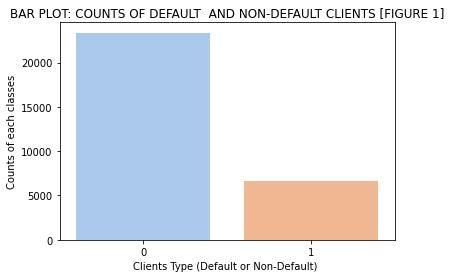

In [ ]:
#Obtaining the bar plot of fueltype visualizing the counts of each classes i.e. Default or Non-Default .
sns.countplot(x='Y',data=data, palette="pastel")
plt.title("BAR PLOT: COUNTS OF DEFAULT  AND NON-DEFAULT CLIENTS [FIGURE 1]")
plt.ylabel("Counts of each classes")
plt.xlabel("Clients Type (Default or Non-Default) ")
plt.show()

Thus, it is observed from the calculation and figure 1 obtained above that there are around 23364 non-default cvlients and 6636 default clients out of 30000 in 2005 which is still safe for the bank. Since here one class is having more frequency than another class thus we call it as imbalance dataset and we will oversample the minority class ('diesel') using SMOTE in later stage of the analysis.


In [ ]:
#Obtaining the percentage of proportion of each classes of  the study variable i.e. default payment next month (Default or Non-Default).
count_non_default = len(data[data['Y']==0])
count_default = len(data[data['Y']==1])
pct_of_non_default = count_non_default/(count_non_default+count_default)
print("percentage of proportion of Non-default clients", pct_of_non_default*100)
pct_of_default = count_default/(count_non_default+count_default)
print("percentage of  proportion of default clients", pct_of_default*100)

percentage of proportion of Non-default clients 77.88000000000001
percentage of  proportion of default clients 22.12


Thus we observe that there were 22.12% of total clients were default clients in bank of Taiwan in 2005.

In [ ]:
#Obtaining the average of each type client(Default or Non-Default)..
data.groupby('Y').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
Y,,,,,,,,,,,,,,,,,,,,,,,,
0,15064.893982,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,-0.405624,51994.227273,49717.435670,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,14773.781947,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,0.167872,0.112116,48509.162297,47283.617842,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


On observing the average age of the client in the bank we can see that the average age is 35.4 in non default clients where as among the default clients it is 35.7 which is little more but such small difference wouldn't make any difference thus we can say that the default and non default clients are around the age 35-36.

Also it is observed that average sex is closer to 2 in both types of client which indicates that in the both groups there are more female clients since female clients are denoted by 2 i  the dataset .

On the similar lines we can make interpretation about other average values under other categorical variables also which are obtained below.

In [ ]:
#Obtaining the average of each of the classes of sex of clients.
data.groupby('SEX').mean()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
SEX,,,,,,,,,,,,,,,,,,,,,,,,
1,14802.770104,163519.825034,1.839250,1.572090,36.519431,0.063257,-0.029189,-0.068557,-0.133832,-0.189182,-0.228634,54281.004038,51918.541723,49115.727961,45000.331090,41587.504963,40101.775320,5668.537264,5960.720138,5412.506057,4869.177995,4830.827052,5276.196753,0.241672
2,15130.282078,170086.462014,1.862246,1.538593,34.806868,-0.069181,-0.202407,-0.230289,-0.277661,-0.316751,-0.332100,49216.395263,47380.997736,45633.108989,42122.600099,39473.816807,38064.427286,5660.327076,5895.200088,5103.057255,4797.786992,4778.752043,5175.665305,0.207763


In [ ]:
#Obtaining the average of each of the classes of education status of clients.
data.groupby('EDUCATION').mean()

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
EDUCATION,,,,,,,,,,,,,,,,,,,,,,,,
0,17091.357143,217142.857143,1.428571,1.714286,38.857143,-0.500000,-1.000000,-0.928571,-0.857143,-1.071429,-1.357143,11780.928571,10056.714286,17521.428571,13350.214286,7409.071429,5272.928571,5945.785714,13030.928571,8825.142857,3620.571429,2541.714286,3007.214286,0.000000
1,14697.212187,212956.069910,1.588663,1.652338,34.231838,-0.233916,-0.408125,-0.425886,-0.461974,-0.479074,-0.485971,48825.437506,47219.101181,45781.689183,42931.065187,40388.891261,38668.076051,6780.933585,7306.622201,6560.585735,5804.565612,5776.562211,6422.554842,0.192348
2,15024.237776,147062.437634,1.616964,1.523022,34.722096,0.102210,0.022523,-0.018532,-0.083036,-0.141411,-0.170848,53605.533999,51359.611404,48662.161582,44748.779758,41588.566287,40431.943835,5080.463293,5106.711333,4556.800000,4375.387313,4452.678689,4716.487028,0.237349
3,15342.314013,126550.270490,1.595282,1.421192,40.299980,0.132805,0.040879,0.002644,-0.066504,-0.139313,-0.183649,47563.546065,45520.299776,43440.916616,38718.582266,35957.469392,34704.597315,4866.397397,5053.454139,3964.056742,3992.658532,3599.658938,3825.749034,0.251576
4,18143.447154,220894.308943,1.658537,1.601626,33.853659,-0.504065,-0.772358,-0.764228,-0.813008,-0.780488,-0.739837,54631.902439,47308.967480,44983.804878,39570.268293,33840.113821,32136.130081,5450.512195,6555.008130,9990.626016,5104.861789,5991.642276,4284.967480,0.056911
5,17443.664286,168164.285714,1.660714,1.475000,35.600000,-0.121429,-0.303571,-0.375000,-0.375000,-0.389286,-0.521429,81614.232143,75743.992857,71743.357143,62275.767857,53568.014286,46083.860714,5970.714286,8912.921429,7718.510714,4927.332143,4633.246429,7772.114286,0.064286
6,16895.019608,148235.294118,1.509804,1.490196,43.901961,-0.176471,-0.313725,-0.372549,-0.411765,-0.509804,-0.647059,82165.313725,78260.627451,70586.313725,54259.490196,44510.745098,39578.509804,9780.450980,6176.431373,7644.941176,5179.490196,11691.137255,14773.901961,0.156863


In [ ]:
#Obtaining the average of each of the classes of marriage status of clients.
data.groupby('MARRIAGE').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
MARRIAGE,,,,,,,,,,,,,,,,,,,,,,,,
0,15755.796296,132962.962963,1.740741,2.740741,37.814815,-0.166667,-0.203704,-0.203704,-0.370370,-0.407407,-0.425926,20400.611111,23964.777778,19253.370370,19007.222222,17719.203704,16815.425926,7795.111111,2781.944444,4027.944444,2864.222222,2124.518519,2238.388889,0.092593
1,15253.288821,182200.893184,1.620031,1.985138,40.016692,-0.036752,-0.163262,-0.206238,-0.259243,-0.308441,-0.331064,53258.129072,50925.088147,48981.229592,44891.819094,41975.121824,40250.686946,5789.741562,6205.714401,5328.491983,5075.922469,4836.070503,5331.664836,0.234717
2,14807.277813,156413.660737,1.589514,1.729454,31.452706,-0.002819,-0.111000,-0.135680,-0.191118,-0.232085,-0.260085,49749.414746,47955.188111,45621.441493,42194.771674,39207.970120,37974.720308,5523.197194,5648.984465,5123.063518,4612.971185,4781.813581,5162.734340,0.209283
3,13734.154799,98080.495356,1.594427,2.235294,42.798762,0.170279,0.000000,0.024768,-0.024768,-0.142415,-0.111455,43176.012384,40048.777090,37212.554180,31230.300310,28269.250774,28582.696594,6910.461300,7865.136223,6150.086687,5121.179567,4563.919505,3408.987616,0.260062


In [ ]:
#Obtaiing the contingency table.
pd.crosstab(data.SEX,data.Y)

Y,0,1
SEX,,
1,9015,2873
2,14349,3763


Thus it is observed that most of the clients who are no- default are males while there are around 2873 default female clients.

In [ ]:
#Obtaiing the contingency table.
pd.crosstab(data.MARRIAGE,data.Y)

Y,0,1
MARRIAGE,,
0,49,5
1,10453,3206
2,12623,3341
3,239,84


Thus it is observed that the maximum number of default female clients are single.

In [ ]:
#Obtaiing the contingency table.
pd.crosstab(data.EDUCATION,data.Y)

Y,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


Thus it is observed that the maximum number of default female clients are university graduate and maximum number of non default clients of bank are also university graduates..

Text(0, 0.5, 'Frequency of client type')

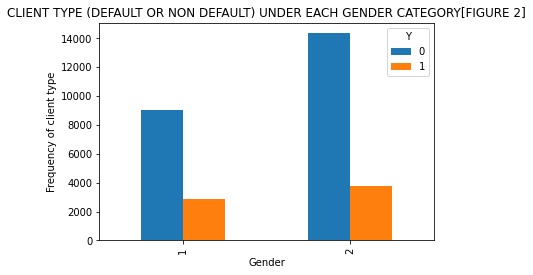

In [ ]:
#BAR PLOT FOR CLIENT TYPE (DEFAULT OR NON DEFAULT) UNDER EACH GENDER CATEGORY
pd.crosstab(data.MARRIAGE,data.Y).plot(kind='bar')
plt.title('CLIENT TYPE (DEFAULT OR NON DEFAULT) UNDER EACH GENDER CATEGORY[FIGURE 2]')
plt.xlabel('Gender')
plt.ylabel('Frequency of client type')

Thus, it is observed from the visualization that proportion of default and non default female clients is more among all the clients of the bank. 

Text(0, 0.5, 'Frequency of client type')

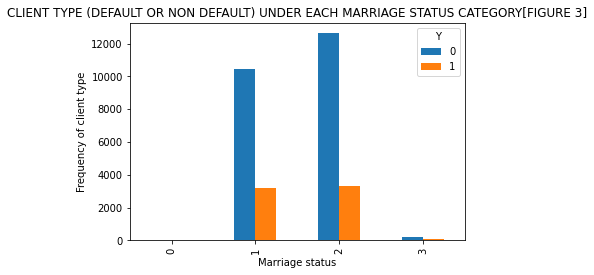

In [ ]:
#BAR PLOT FOR CLIENT TYPE (DEFAULT OR NON DEFAULT) UNDER EACH MARRIAGE STATUS CATEGORY
pd.crosstab(data.MARRIAGE,data.Y).plot(kind='bar')
plt.title('CLIENT TYPE (DEFAULT OR NON DEFAULT) UNDER EACH MARRIAGE STATUS CATEGORY[FIGURE 3]')
plt.xlabel('Marriage status')
plt.ylabel('Frequency of client type')

Thus, from figure 3 it is observed that most of the default clients are single.

Text(0, 0.5, 'Frequency of client type')

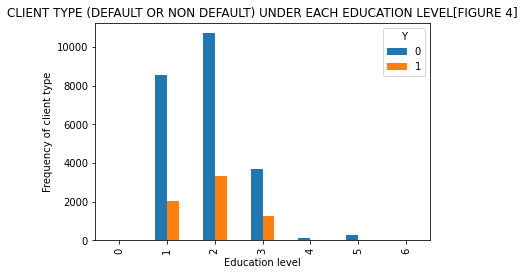

In [ ]:
#BAR PLOT FOR CLIENT TYPE (DEFAULT OR NON DEFAULT) UNDER EACH EDUCATION LEVEL
pd.crosstab(data.EDUCATION,data.Y).plot(kind='bar')
plt.title('CLIENT TYPE (DEFAULT OR NON DEFAULT) UNDER EACH EDUCATION LEVEL[FIGURE 4]')
plt.xlabel('Education level')
plt.ylabel('Frequency of client type')

From figure 4 we observe that most of the default clients are university student this could be due to the level of irresponsibilty students have

Text(0, 0.5, 'Proportion of client type')

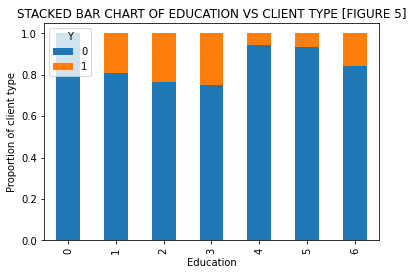

In [ ]:
#Stacked Bar Chart of education vs client type
table=pd.crosstab(data.EDUCATION,data.Y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('STACKED BAR CHART OF EDUCATION VS CLIENT TYPE [FIGURE 5]')
plt.xlabel('Education')
plt.ylabel('Proportion of client type')

From figure 5 we observe that the proportion of default clients of bank of Taiwan studies in high school.

Text(0, 0.5, 'Frequency')

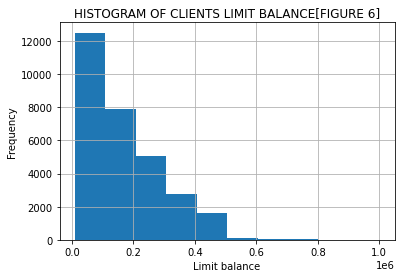

In [ ]:
#Histogram of limit balance of a client
data.LIMIT_BAL.hist()
plt.title('HISTOGRAM OF CLIENTS LIMIT BALANCE[FIGURE 6]')
plt.xlabel('Limit balance')
plt.ylabel('Frequency')


From, figure 6 we observe that the client's limit balance is positively skewed.

Text(0, 0.5, 'Frequency')

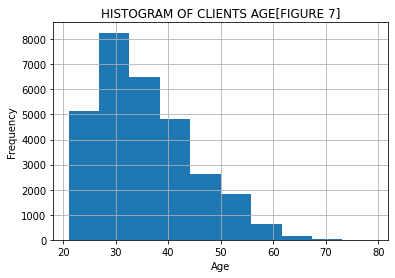

In [ ]:
#Histogram of client's age
data.AGE.hist()
plt.title('HISTOGRAM OF CLIENTS AGE[FIGURE 7]')
plt.xlabel('Age')
plt.ylabel('Frequency')

From, figure 6 we observe that the client's age is also positively skewed.

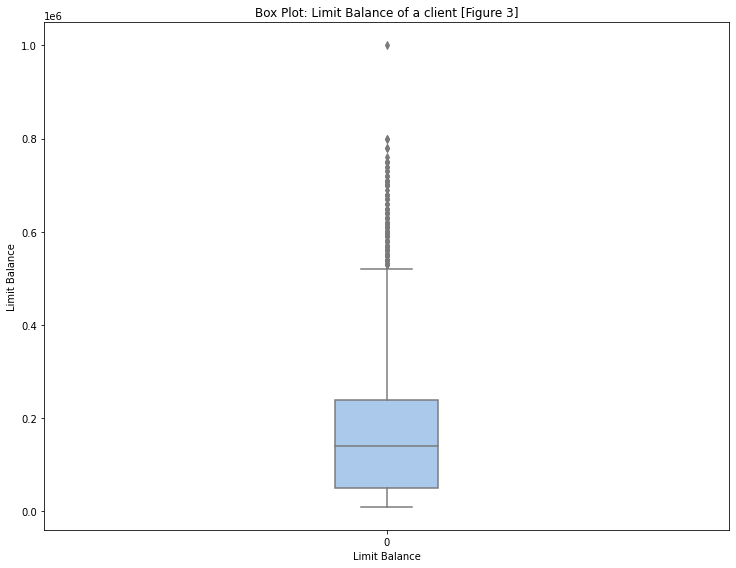

In [ ]:
#Plotting a box plot for Limit Balance.
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(122)
sns.boxplot(data=data['LIMIT_BAL'],palette='pastel',width=0.15,ax=ax)
ax.set_title('Box Plot: Limit Balance of a client [Figure 8]')
ax.set_xlabel('Limit Balance')
ax.set_ylabel('Limit Balance')
plt.tight_layout()
plt.show()

Thus we observe that there exist outliers in the datase of limit balance.

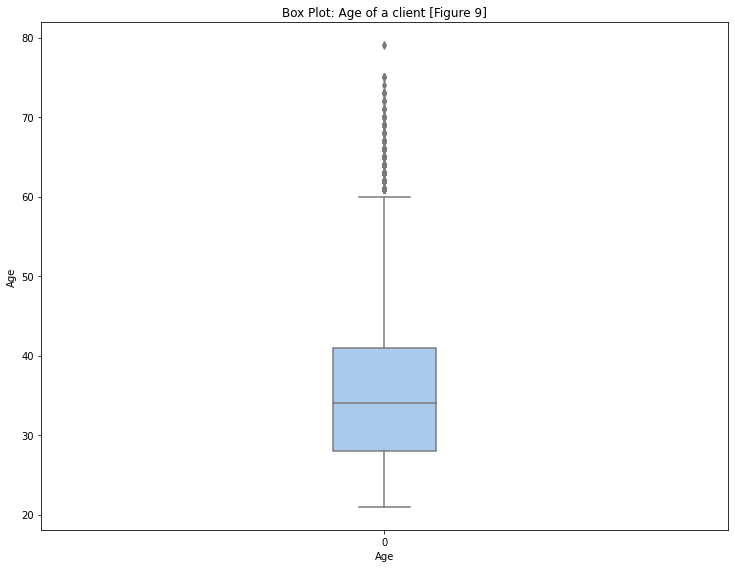

In [ ]:
#Plotting a box plot Age.
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(122)
sns.boxplot(data=data['AGE'],palette='pastel',width=0.15,ax=ax)
ax.set_title('Box Plot: Age of a client [Figure 9]')
ax.set_xlabel('Age')
ax.set_ylabel('Age')
plt.tight_layout()
plt.show()

Thus we observe that there exist outliers in the datase of limit balance.

In [ ]:
#Plotting a box plot for Limit Balance.
fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(122)
sns.boxplot(data=data['LIMIT_BAL'],palette='pastel',width=0.15,ax=ax)
ax.set_title('Box Plot: Limit Balance of a client [Figure 11]')
ax.set_xlabel('Limit Balance')
ax.set_ylabel('Limit Balance')
plt.tight_layout()
plt.show()

**ANALYSIS**

CODING CATEGORICAL VARIABLES: Here in our dataset it is not needed to create a dummy variables since the categorical variables are already existing in numerical or boolean form.

In [ ]:
#Specifying the column names that is to be remove from the dataset which will be used for the analysis.
cat_vars=['ID']

#converting column names to list
data_vars=data.columns.values.tolist() 

#to remove the variables that are not needed
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
#Variable names list of all the variables present in the dataset.
data_vars

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'Y']

In [ ]:
#Final data which will be used for the analysis by removing all the unnecessary columns.
data_final=data[to_keep]
data_final.columns.values

array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'Y'], dtype=object)

Thus, these are the names of the columns which are to be kept for the analysis.

SYNTHETIC MINORITY OVERSAMPLING TECHNIQUE (SMOTE)

In [ ]:
#Diving the variables into the set of x (independent variable) an y (dependent variable)
X = data_final.loc[:, data_final.columns != 'Y']
y = data_final.loc[:, data_final.columns == 'Y']

In [ ]:
#Installing the library
!pip install imbalanced-learn 

In [ ]:
#Performing SMOTE to deal with the minority class in imbalance data.
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Y'])
# Checking the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of automobile having 'gas' fueltype in oversampled data",len(os_data_y[os_data_y['Y']==0]))
print("Number of automobile having 'diesel' fueltype",len(os_data_y[os_data_y['Y']==1]))
print("Proportion of automobile having 'gas' fueltype in oversampled data is ",len(os_data_y[os_data_y['Y']==0])/len(os_data_X))
print("Proportion of automobile having 'diesel' fueltype in oversampled data is ",len(os_data_y[os_data_y['Y']==1])/len(os_data_X))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

length of oversampled data is  32608
Number of automobile having 'gas' fueltype in oversampled data 16304
Number of automobile having 'diesel' fueltype 16304
Proportion of automobile having 'gas' fueltype in oversampled data is  0.5
Proportion of automobile having 'diesel' fueltype in oversampled data is  0.5


Thus, the minority class is oversampled using SMOTE above in the above cell.

FEATURE SELECTION- RECURSIVE FEATURE ELIMINATION

In [ ]:
#Eliminating all the least important features and Selecting the most important predictors.
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#20 is the number of features to be selected for the model
rfe = RFE(logreg, 20)
#RFE wrapper is used to fit logistic regression for the oversampled data
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
#Obtaining all the selected features.
print(rfe.support_)
X_cols=os_data_X.columns.values.tolist()
selected_features= [i for indx,i in enumerate(X_cols) if rfe.support_[indx] == True]#select columns that are significant
selected_features

[False  True  True  True  True  True  True  True  True  True  True  True
 False  True  True False  True  True  True  True  True  True  True]


['SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

Thus, the selected features using RFE for our logistic model are, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, BILL_AMT1, BILL_AMT3, BILL_AMT4, BILL_AMT6, PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6'

In [ ]:
#Assigning the finally selected features to x(set of independent variables) and fueltype to y (independent variable)
X=os_data_X[selected_features]
y=os_data_y['Y']

In [ ]:
#Fitting the logistic regression and obtaining the summary.
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.589387
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.150     
Dependent Variable: Y                AIC:              38477.4495
Date:               2021-08-28 15:48 BIC:              38645.2958
No. Observations:   32608            Log-Likelihood:   -19219.   
Df Model:           19               LL-Null:          -22602.   
Df Residuals:       32588            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
SEX          -0.2912    0.0223  -13.0700  0.0000  -0.3349  -0.2475
EDUCATION    -0.3259    0.0176  -18.5625  0.0000  -0.3603  -0.

It is observed from the above table that p value of PAY_4, PAY_6, BILL_AMT4, BILL_AMT6 are > 0.05 , thus we reject the null hypothesis and conclude that these variables are not having any significant effect on predicting dependent variable i.e. client type if the  client is default or non-default. Thus,we can remove these variables from the model. 

Also, we observe that the pseudo r squred value is 0.15 which is quite less which indicates the fact that this model is not good in prediction of default of a clients.

IMPLEMENTING LOGISTIC REGRESSION

In [ ]:
#Implementation of logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

PREDICTION AND CALCULATIONS OF ACCURACY MEASURE

In [ ]:
#Obtaining the accuracy of logistic regression
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))#score() gives classification accuracy measure

Accuracy of logistic regression classifier on test set: 0.62


Here, it is seen that the accuracy is 0.62 i.e. 62%  thus we can say that the model is only 62% accurate in predicting whether the client of Taiwan bank is default or not.

In [ ]:
#Obtaining the accuracy of logistic regression
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1369 1913]
 [ 593 2647]]


From, the above confusion matrix we conclude that 4016 (1369+2647) correct predictions are made using the model and 2506 (593+1913) wrong predictions are made. But we know that we have in total 30000 observations thus, our model predicts more correct results.

In [ ]:
#Obtaining the confusion matrix to check for the accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.42      0.52      3282
           1       0.58      0.82      0.68      3240

    accuracy                           0.62      6522
   macro avg       0.64      0.62      0.60      6522
weighted avg       0.64      0.62      0.60      6522



From the above table it is observed that the precision for both the class '0' is 0.70 and class '1' is 0.58 which indicates the good case thus the  ability of a classifier not to predict a client as default if he is non-default client (or vice versa) is good. 

Also we observe that recall for the class '0' is 0.42 and class '1' is 0.82 which indicates that the ability of a classifier to predict all non-default client is non-default not very good but ability of a classifier to predict all default client as default is  good. 

It is observed that F1score is 0.52 and 0.68 respectively for each non-default and default class which indicates that more weight is given to precission and lessweight is given to recall.

Thus from all the above results we conclude that our binary classifier is moderately good.

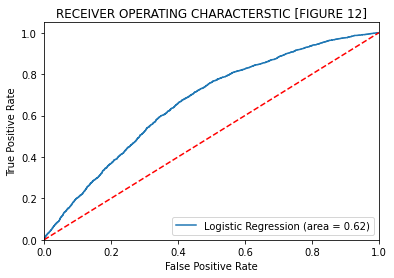

In [ ]:
#Obtaining the ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))#computes AUC under ROC
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])#creates ROC 
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RECEIVER OPERATING CHARACTERSTIC [FIGURE 12]')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

From the above figure we observe that the red dotted line is not very farther from blue line which is not a good indication and also since the AUC value is 0.62 which is a moderately good value for binary classifier. Thus,we conclude that the binary classifier is moderately accurate.

**CONCLUSION**

From the above analysis it is observed that the binary classifier is moderately accurate in predicting the default customers for Taiwan bank in 2005.